In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator, StatevectorSimulator

import matplotlib.pyplot as plt

import math

In [3]:
def prob_to_angle(prob):
    """
    Converts a given P(psi) value into an equivalent theta value.
    """
    return 2 * math.asin(math.sqrt(prob))

In [4]:
def run_circuit(qc, simulator = StatevectorSimulator(), shots=1, hist=True):
    
    compiled_circuit = transpile(qc, simulator)
    sim_result = simulator.run(compiled_circuit, shots=shots).result()
    
    return plot_histogram(sim_result.get_counts(), figsize=(18,4)) if hist else results

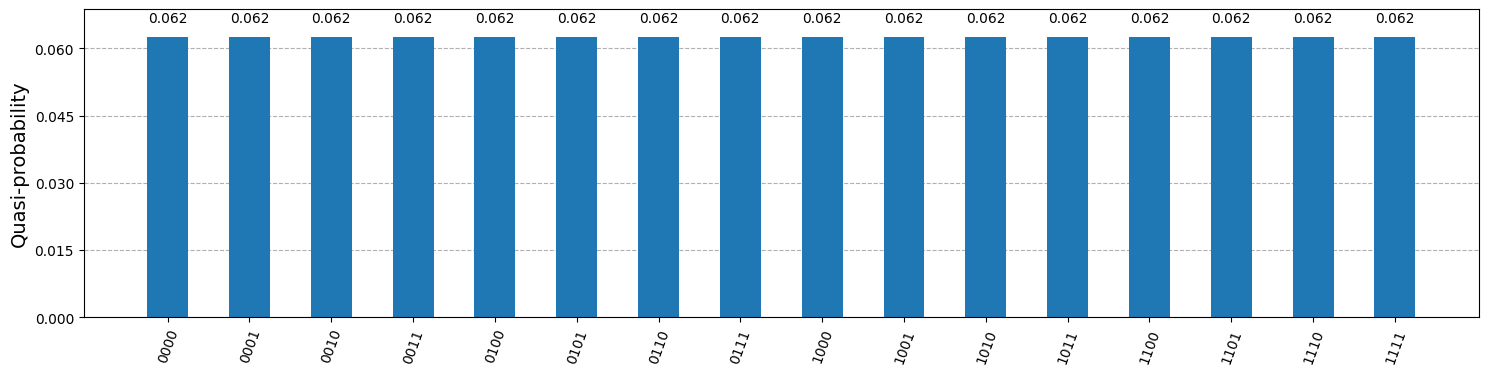

In [5]:
qc = QuantumCircuit(4)
qc.h([0, 1, 2, 3])
run_circuit(qc)

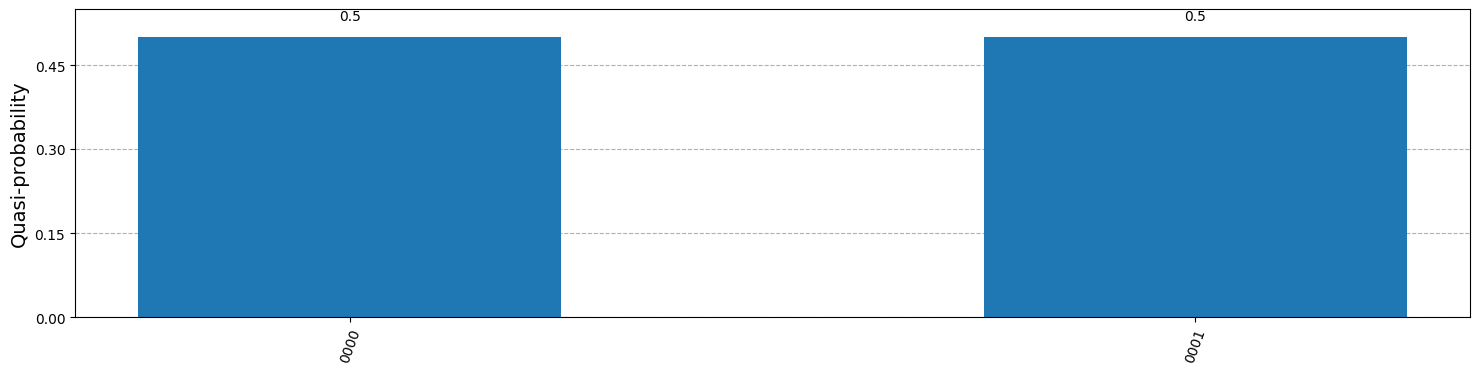

In [6]:
qc = QuantumCircuit(4)
qc.h(0)
run_circuit(qc)

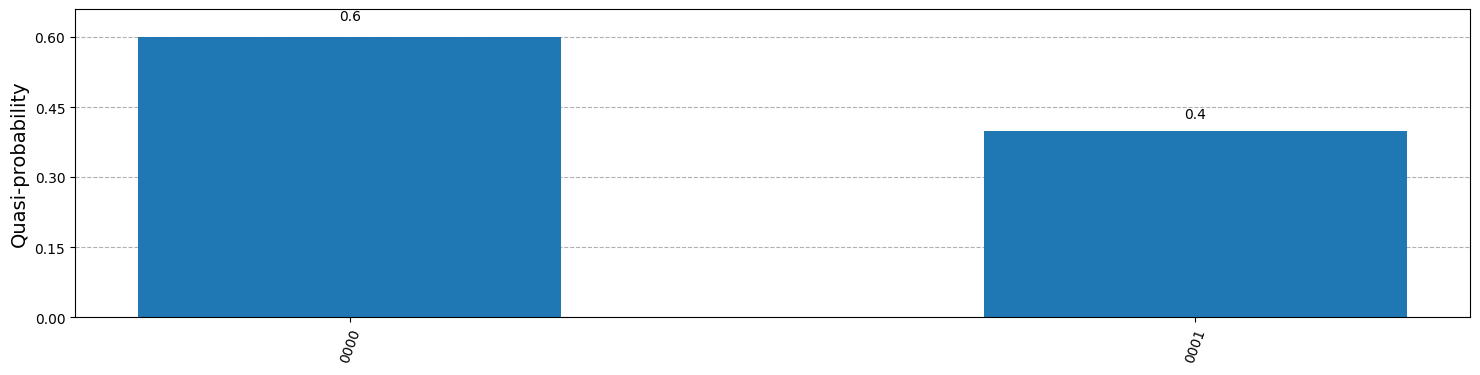

In [7]:
event_a = 0.4
qc = QuantumCircuit(4)
qc.ry(prob_to_angle(event_a), 0)

run_circuit(qc)

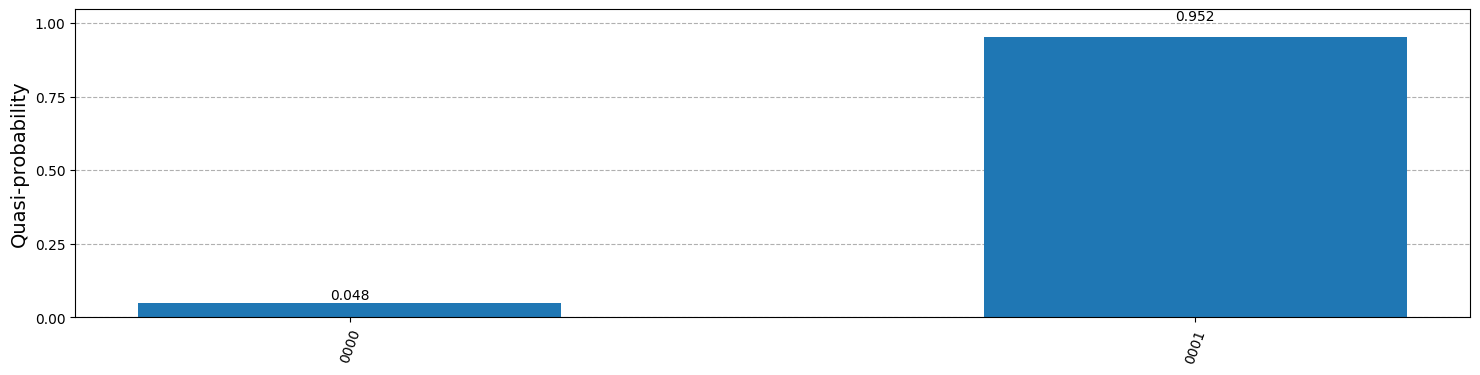

In [8]:
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)
qc.ry(prob_to_angle(event_a), 0)
qc.ry(prob_to_angle(event_b), 0)

run_circuit(qc)

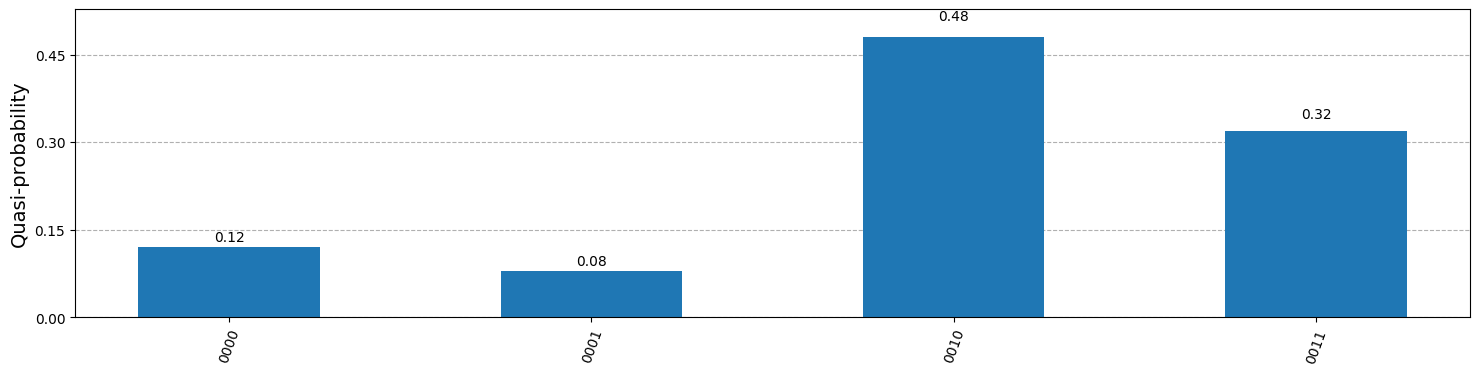

In [9]:
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)
qc.ry(prob_to_angle(event_a), 0)
qc.ry(prob_to_angle(event_b), 1)

run_circuit(qc)

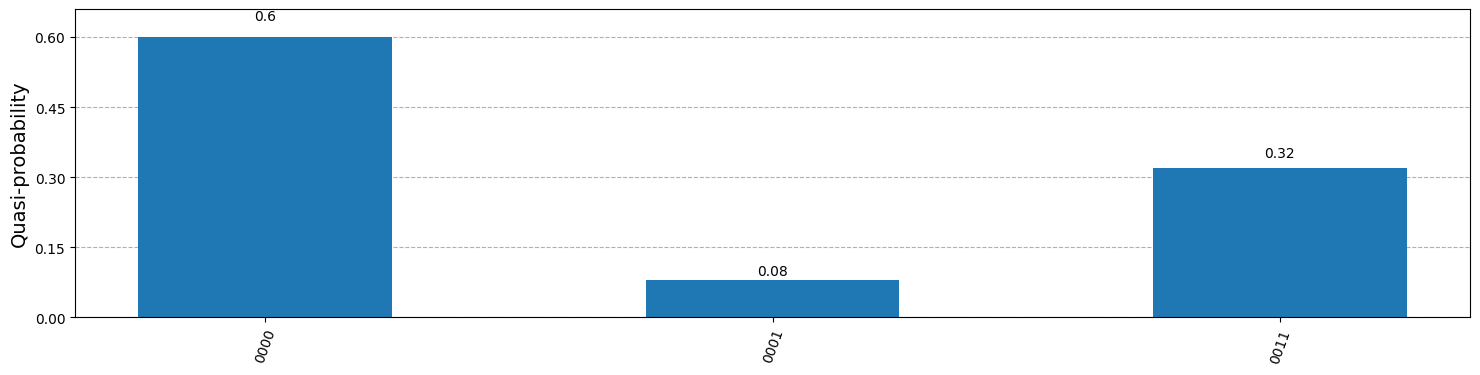

In [10]:
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)
qc.ry(prob_to_angle(event_a), 0)
qc.ry(prob_to_angle(event_b) / 2, 1)

qc.cx(0, 1)

qc.ry(-prob_to_angle(event_b) / 2, 1)

qc.cx(0, 1)

run_circuit(qc)

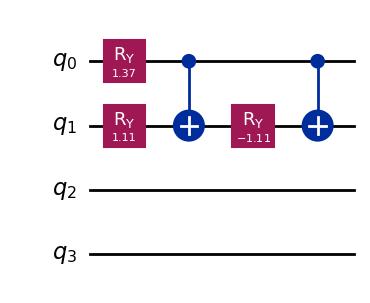

In [11]:
qc.draw('mpl')

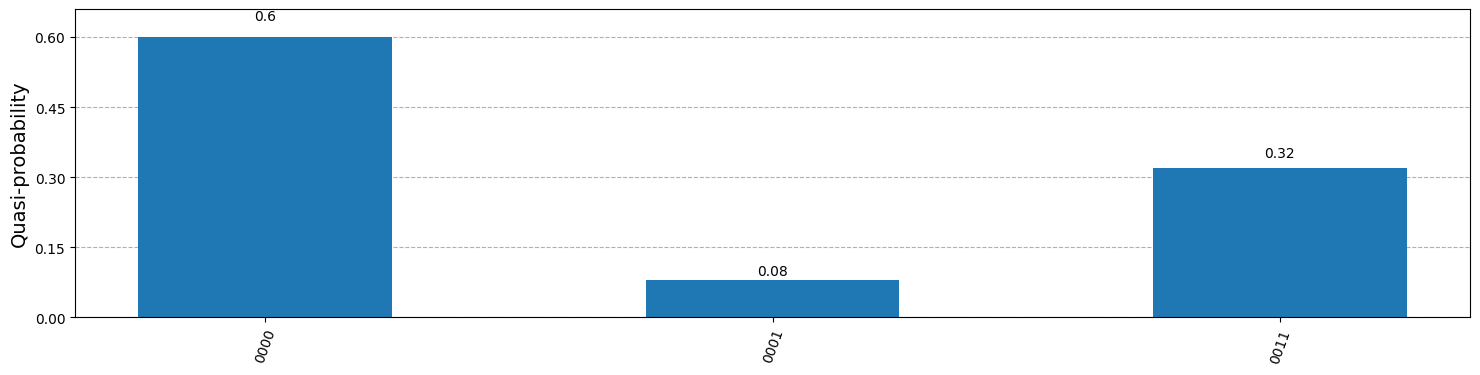

In [12]:
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)
qc.ry(prob_to_angle(event_a), 0)
qc.cry(prob_to_angle(event_b), 0, 1)

run_circuit(qc)

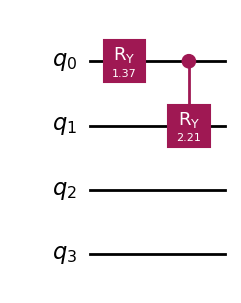

In [13]:
qc.draw('mpl')

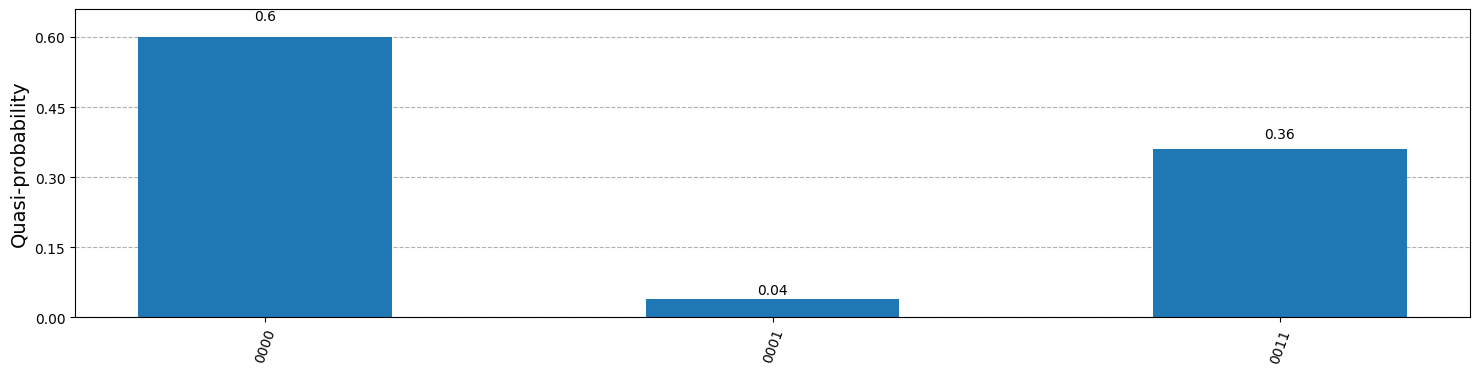

In [14]:
prior = 0.4
modifier = 0.9

qc = QuantumCircuit(4)

qc.ry(prob_to_angle(prior), 0)
qc.cry(prob_to_angle(modifier), 0, 1)

run_circuit(qc)

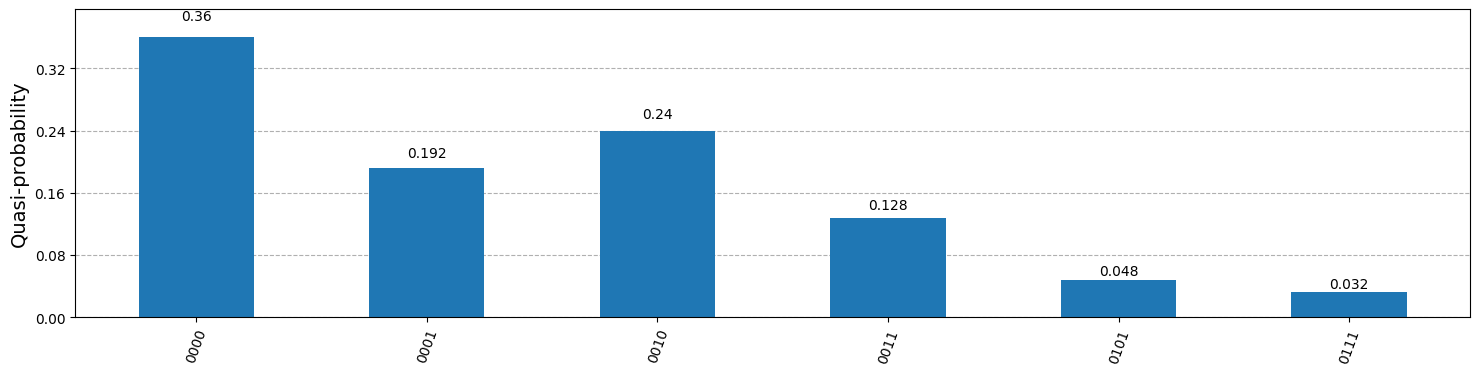

In [15]:
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

qc.ry(prob_to_angle(prior), 0)
qc.ry(prob_to_angle(prior), 1)

qc.cry(prob_to_angle(modifier-1), 0, 2)

run_circuit(qc)

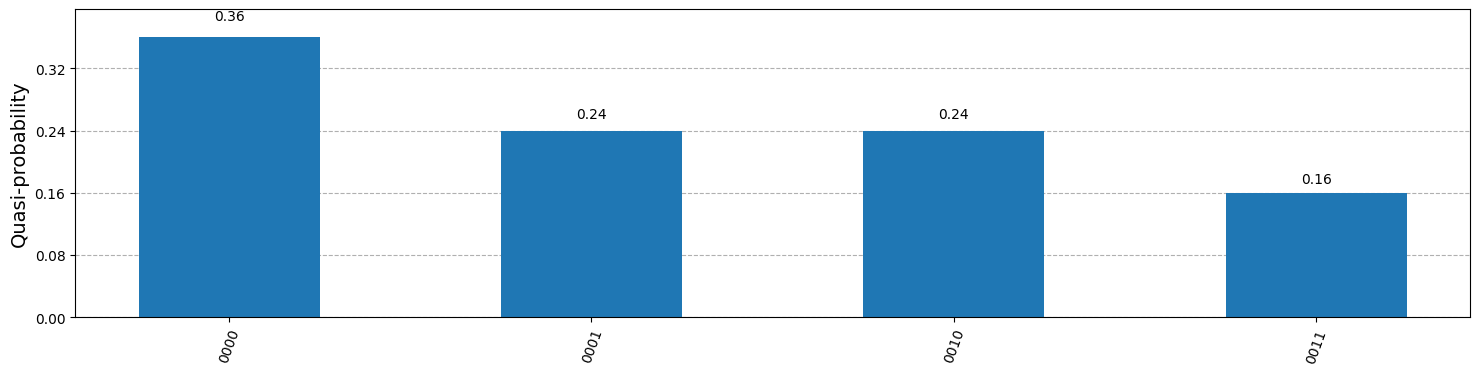

In [16]:
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

qc.ry(prob_to_angle(prior), 0)
qc.ry(prob_to_angle(prior), 1)

run_circuit(qc)

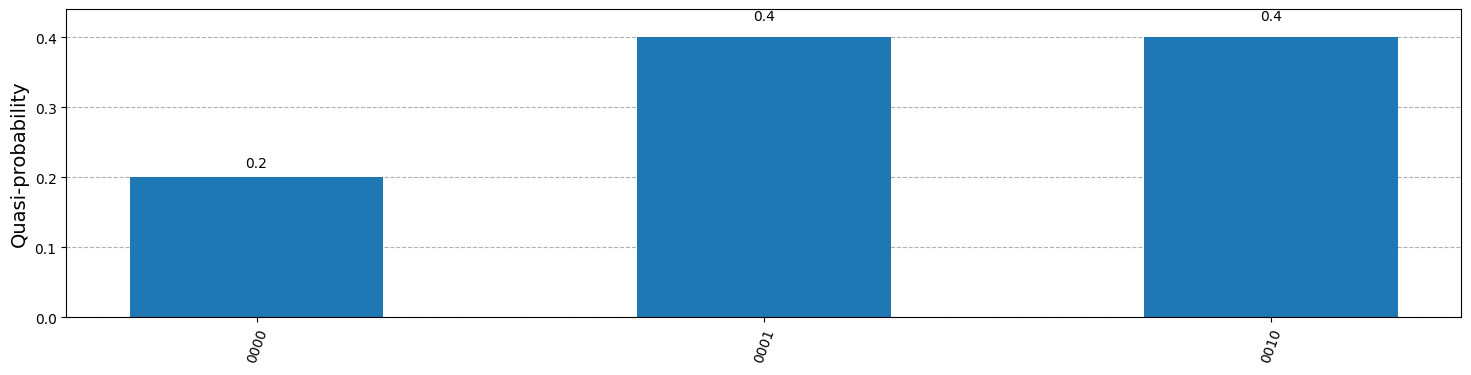

In [17]:
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

qc.ry(prob_to_angle(prior), 0)
qc.x(0)
qc.cry(prob_to_angle(prior / (1-prior)), 0, 1)
qc.x(0)

run_circuit(qc)

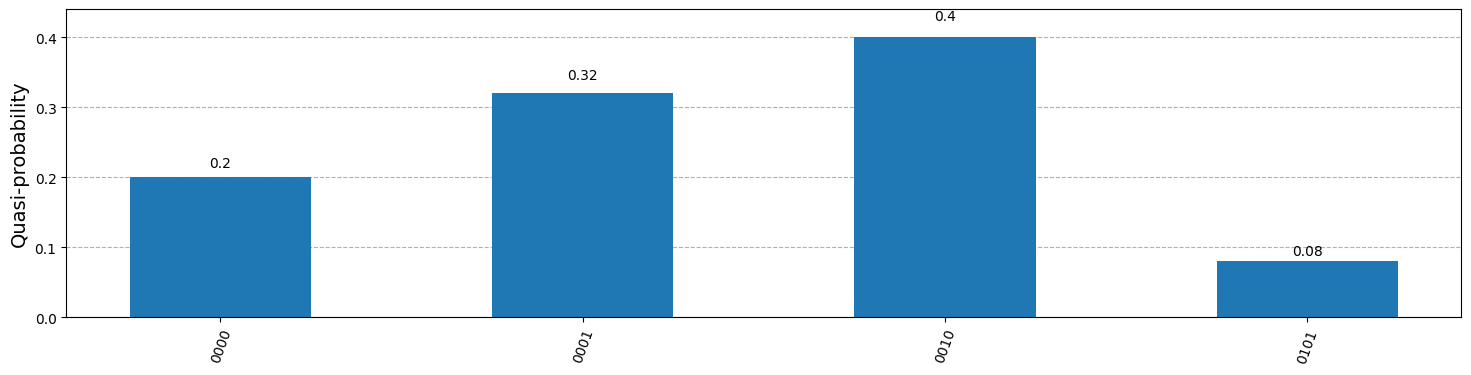

In [19]:
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

qc.ry(prob_to_angle(prior), 0)
qc.x(0)
qc.cry(prob_to_angle(prior / (1 - prior)), 0, 1)
qc.x(0)
qc.cry(prob_to_angle(modifier - 1), 0, 2)
run_circuit(qc)

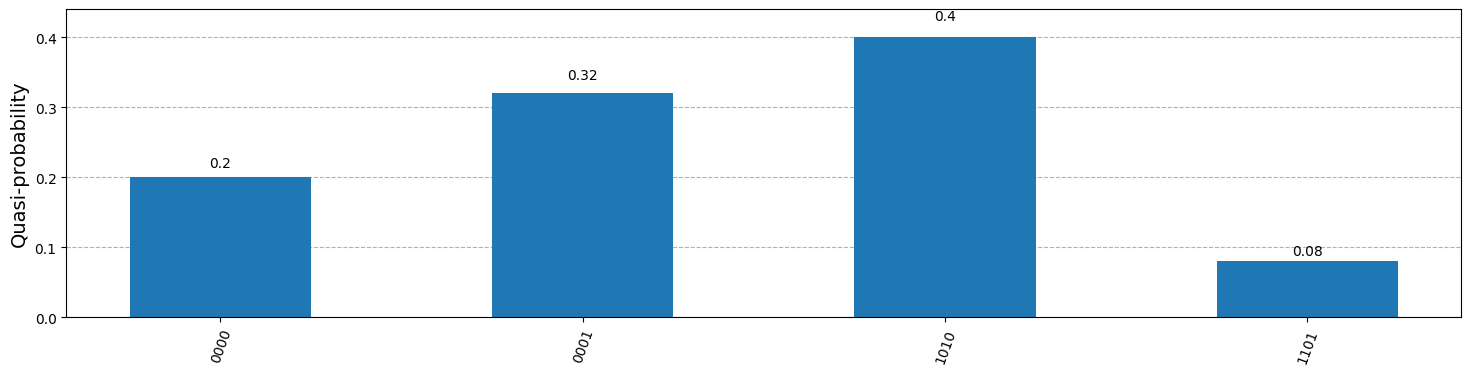

In [20]:
prior = 0.4
modifier = 1.2

qc = QuantumCircuit(4)

qc.ry(prob_to_angle(prior), 0)
qc.x(0)
qc.cry(prob_to_angle(prior / (1 - prior)), 0, 1)
qc.x(0)
qc.cry(prob_to_angle(modifier - 1), 0, 2)

qc.cx(1,3)
qc.cx(2,3)
run_circuit(qc)

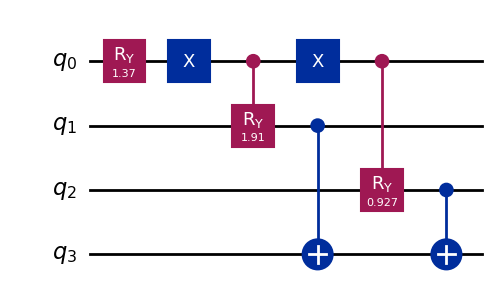

In [21]:
qc.draw('mpl')